<a href="https://colab.research.google.com/github/lalit1511/EDA_Projects/blob/main/Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/all_stocks_5yr.csv')

# Display the first few rows
df.head()


,date,open,high,low,close,volume,Name
0,08-02-2013,15.07,15.12,14.63,14.75,8407500,AAL
1,11-02-2013,14.89,15.01,14.26,14.46,8882000,AAL
2,12-02-2013,14.45,14.51,14.10,14.27,8126000,AAL
3,13-02-2013,14.30,14.94,14.25,14.66,10259500,AAL
4,14-02-2013,14.94,14.96,13.16,13.99,31879900,AAL


In [10]:
#
# Get information about the dataset
df.info()

# Get summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [11]:
# Check for missing values
df.isnull().sum()

# Drop duplicates if any
df.drop_duplicates(inplace=True)


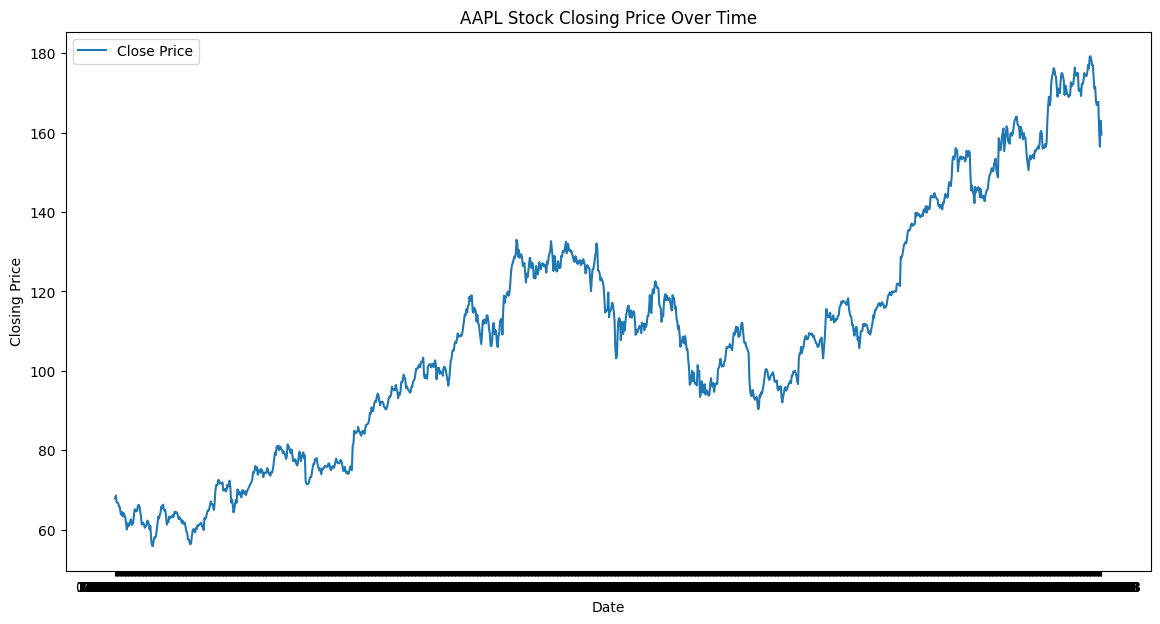

In [12]:
#
import matplotlib.pyplot as plt
import seaborn as sns

# Plot closing price over time for a specific company
company = 'AAPL'  # Replace with desired company ticker
company_data = df[df['Name'] == company]

plt.figure(figsize=(14, 7))
plt.plot(company_data['date'], company_data['close'], label='Close Price')
plt.title(f'{company} Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [13]:
#
# Check data types
df.dtypes


,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object


In [14]:
#Check for Duplicates
# Count of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


In [17]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y') # Specifying format as day-month-year
df.dtypes

,0
date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object


In [19]:
#
top_avg_close = df.groupby('Name')['close'].mean().sort_values(ascending=False).head(10)
print(top_avg_close)




Name
PCLN     1312.873538
GOOG      725.403353
GOOGL     682.233847
AZO       619.703654
AMZN      576.880041
CMG       493.256008
REGN      381.833100
MTD       356.297498
BLK       348.628967
BIIB      295.413264
Name: close, dtype: float64


<ipython-input-20-c20800a07c26>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_avg_close.values, y=top_avg_close.index, palette='viridis')


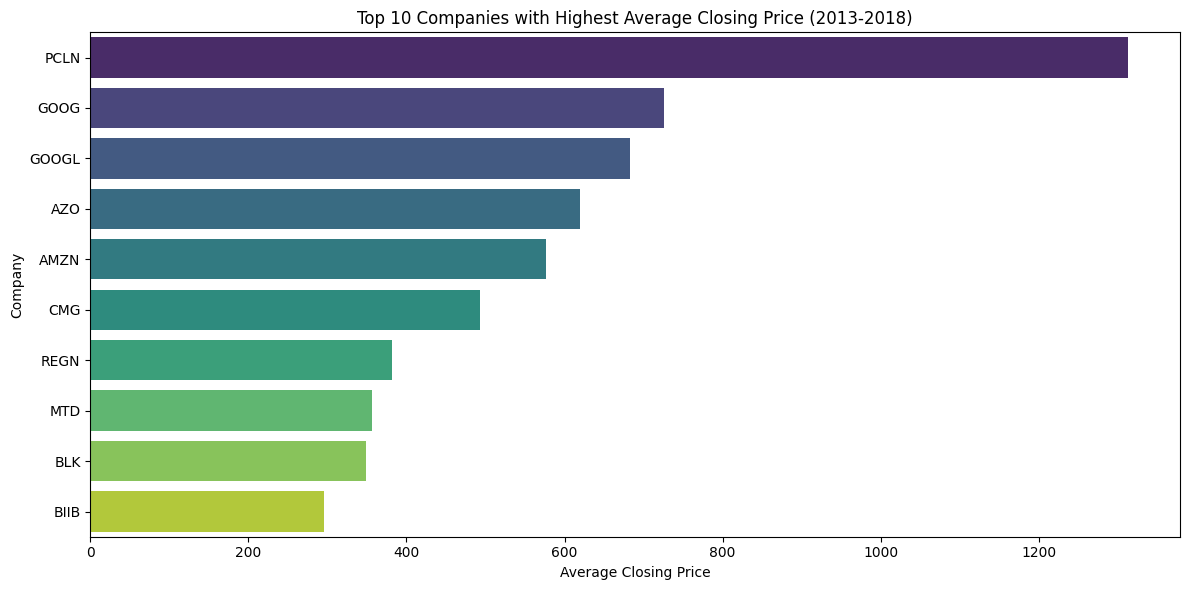

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_avg_close.values, y=top_avg_close.index, palette='viridis')
plt.title('Top 10 Companies with Highest Average Closing Price (2013-2018)')
plt.xlabel('Average Closing Price')
plt.ylabel('Company')
plt.tight_layout()
plt.show()


In [3]:
#Step 10: Calculate and Visualize Volatility (Risk Level) of Companies
#👉 Volatility is often measured by the standard deviation of stock prices.
#Higher standard deviation = more risky stock.

# Calculate daily price range (high - low)
df['range'] = df['high'] - df['low']

# Calculate average daily range (volatility) per company
volatility = df.groupby('Name')['range'].mean().sort_values(ascending=False)

# Top 10 most volatile companies
top_volatility = volatility.head(10)
top_volatility


,range
Name,
PCLN,23.530972
REGN,11.627797
GOOG,11.365405
AMZN,10.903705
GOOGL,10.670986
AZO,10.661988
CMG,10.453365
BIIB,7.701303
MTD,6.183746


<ipython-input-6-c2f79962455f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_volatility.values, y=top_volatility.index, palette='magma')


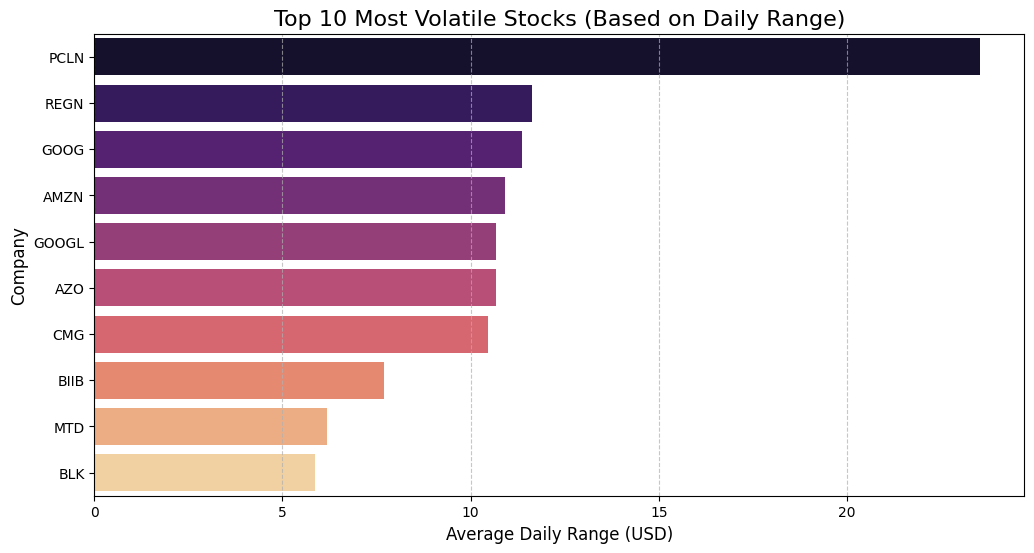

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.barplot(x=top_volatility.values, y=top_volatility.index, palette='magma')
plt.title('Top 10 Most Volatile Stocks (Based on Daily Range)', fontsize=16)
plt.xlabel('Average Daily Range (USD)', fontsize=12)
plt.ylabel('Company', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [7]:
#Calculate "Overall Growth %" for Each Stock
# Group by 'Name' and get the first and last 'Close' prices
growth_df = df.groupby('Name').agg(first_close=('close', 'first'), last_close=('close', 'last'))

# Calculate the Growth %
growth_df['growth_percent'] = ((growth_df['last_close'] - growth_df['first_close']) / growth_df['first_close']) * 100

# Sort stocks by highest growth
growth_df_sorted = growth_df.sort_values(by='growth_percent', ascending=False)

# Display top 10 growing stocks
growth_df_sorted.head(10)


,first_close,last_close,growth_percent
Name,,,
NVDA,12.3700,228.80,1749.636217
NFLX,25.8528,264.56,923.332096
ALGN,32.7300,234.33,615.948671
EA,17.3700,123.05,608.405296
STZ,31.8500,214.15,572.370487
AVGO,35.3200,237.38,572.083805
FB,28.5450,180.18,531.213873
MU,7.7500,42.01,442.064516
AMZN,261.9500,1416.78,440.858943


<ipython-input-8-31da0eef8d26>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_growth.index, y=top_10_growth['growth_percent'], palette='viridis')


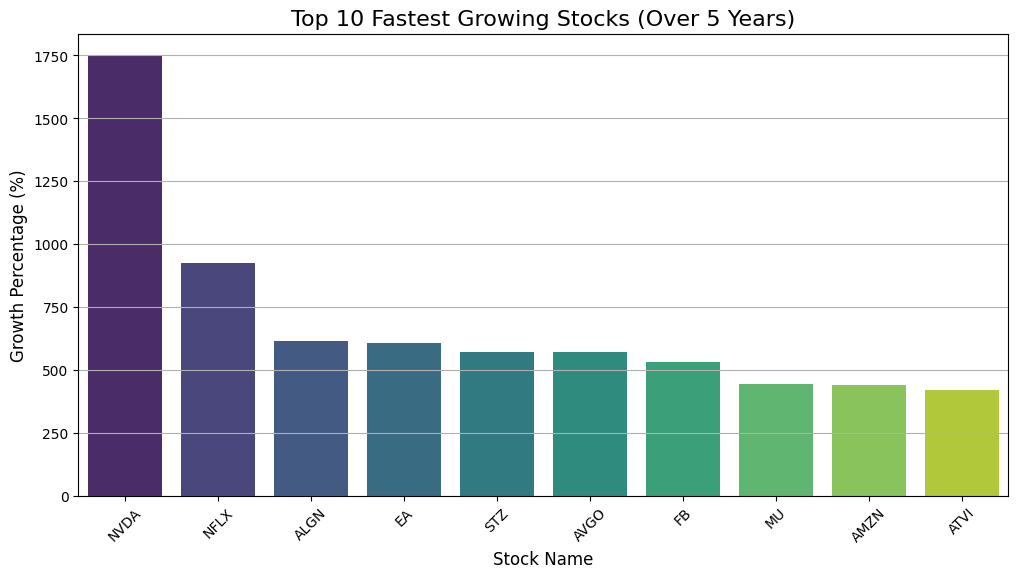

In [8]:
#
# Take top 10 growing stocks
top_10_growth = growth_df_sorted.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_growth.index, y=top_10_growth['growth_percent'], palette='viridis')
plt.title('Top 10 Fastest Growing Stocks (Over 5 Years)', fontsize=16)
plt.ylabel('Growth Percentage (%)', fontsize=12)
plt.xlabel('Stock Name', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [9]:
#Calculate and Analyze Stock Volatility
# Calculate daily return for each stock
df['daily_return'] = df.groupby('Name')['close'].pct_change()

# Calculate standard deviation of daily returns as a measure of volatility
volatility = df.groupby('Name')['daily_return'].std()

# Sort by most volatile
volatility_sorted = volatility.sort_values(ascending=False)

volatility_sorted.head(10)


,daily_return
Name,
CHK,0.041658
AMD,0.037784
BHGE,0.035219
FCX,0.034123
LNT,0.033373
VRTX,0.032103
INCY,0.029777
MRO,0.029739
WMB,0.029559


<ipython-input-10-0867c2b5d235>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=volatility_sorted.head(10).values, y=volatility_sorted.head(10).index, palette='coolwarm')


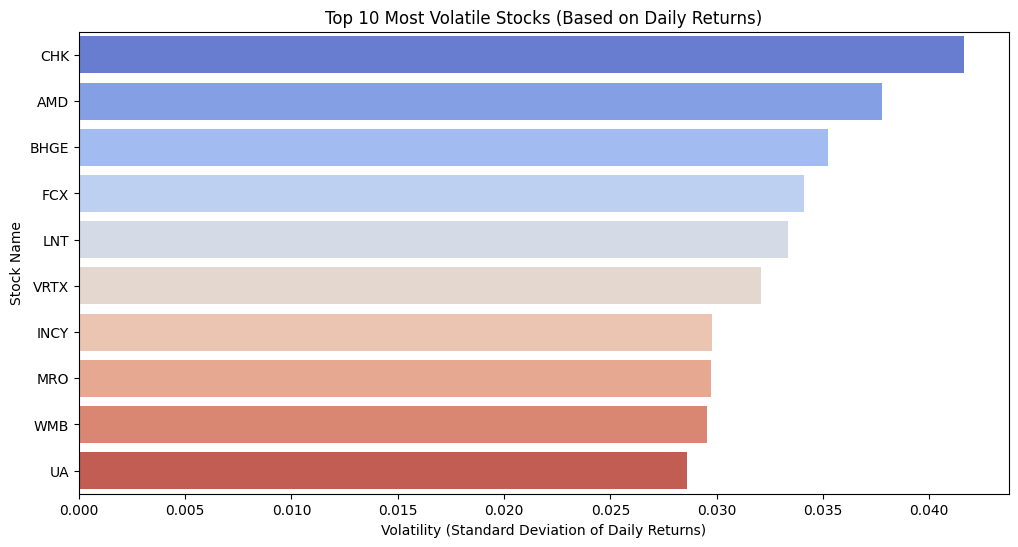

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the top 10 most volatile stocks
plt.figure(figsize=(12,6))
sns.barplot(x=volatility_sorted.head(10).values, y=volatility_sorted.head(10).index, palette='coolwarm')
plt.title('Top 10 Most Volatile Stocks (Based on Daily Returns)')
plt.xlabel('Volatility (Standard Deviation of Daily Returns)')
plt.ylabel('Stock Name')
plt.show()


<ipython-input-11-879604c039ef>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=least_volatility.values, y=least_volatility.index, palette='crest')


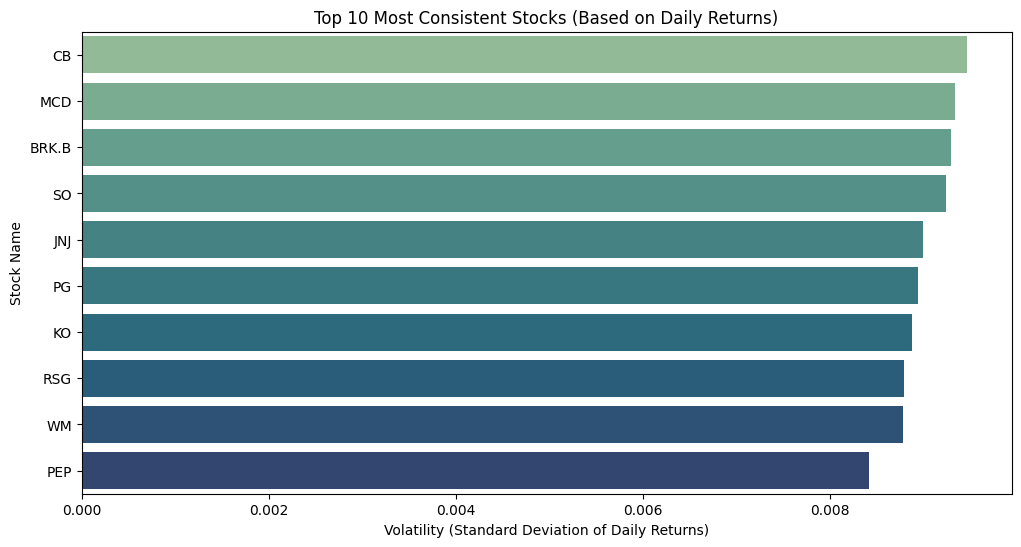

In [11]:
# Identify the Most Consistent Stocks
# Find the least volatile (most consistent) stocks
least_volatility = volatility_sorted.tail(10)

# Plot the least volatile stocks
plt.figure(figsize=(12,6))
sns.barplot(x=least_volatility.values, y=least_volatility.index, palette='crest')
plt.title('Top 10 Most Consistent Stocks (Based on Daily Returns)')
plt.xlabel('Volatility (Standard Deviation of Daily Returns)')
plt.ylabel('Stock Name')
plt.show()


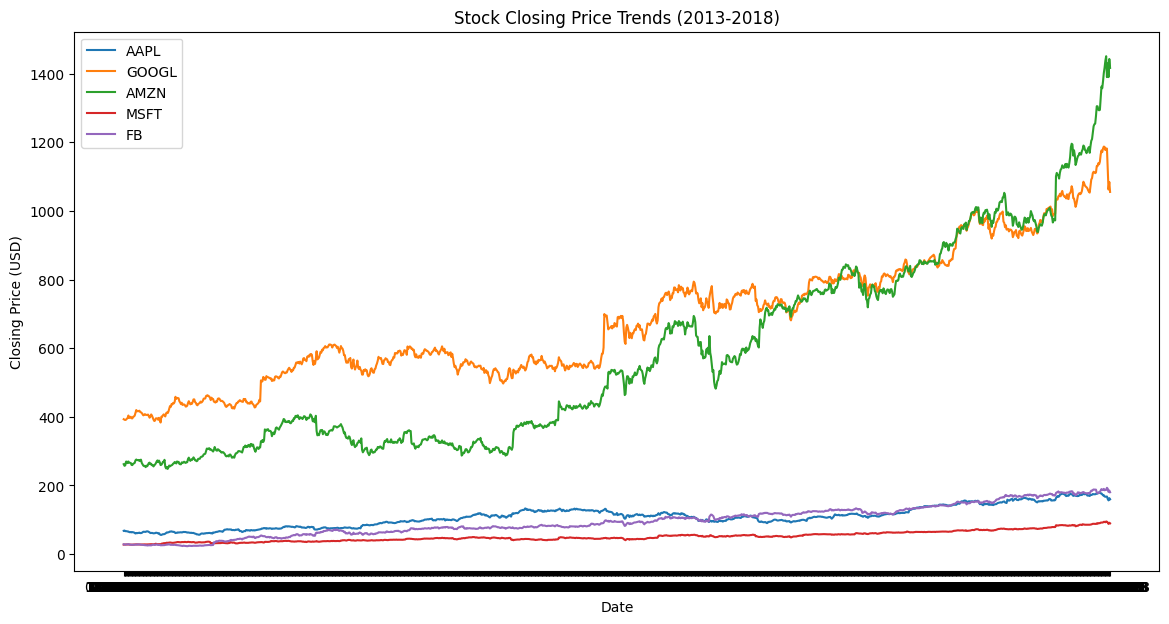

In [12]:
#: Analyze Stock Trends Over Time
# Let's pick a few famous companies
selected_companies = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'FB']

# Filter data for these companies
selected_data = df[df['Name'].isin(selected_companies)]

# Plot Closing Price Trends
plt.figure(figsize=(14,7))
for company in selected_companies:
    company_data = selected_data[selected_data['Name'] == company]
    plt.plot(company_data['date'], company_data['close'], label=company)

plt.title('Stock Closing Price Trends (2013-2018)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()


Name
PCLN     23.530972
REGN     11.627797
GOOG     11.365405
AMZN     10.903705
GOOGL    10.670986
AZO      10.661988
CMG      10.453365
BIIB      7.701303
MTD       6.183746
BLK       5.860916
Name: price_range, dtype: float64


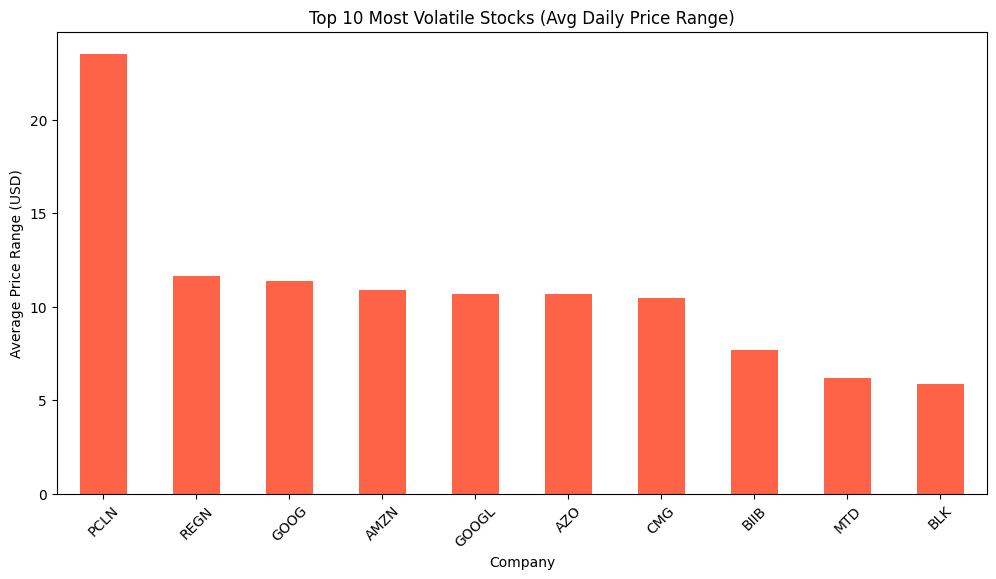

In [13]:
#Analyze Stock Price Volatility
# Calculate daily price range (High - Low)
df['price_range'] = df['high'] - df['low']

# Average daily price range per company
volatility = df.groupby('Name')['price_range'].mean().sort_values(ascending=False)

# Display Top 10 most volatile stocks
print(volatility.head(10))

# Plotting
plt.figure(figsize=(12,6))
volatility.head(10).plot(kind='bar', color='tomato')
plt.title('Top 10 Most Volatile Stocks (Avg Daily Price Range)')
plt.ylabel('Average Price Range (USD)')
plt.xlabel('Company')
plt.xticks(rotation=45)
plt.show()
